# Vanilla GAN of the MNIST dataset with KERAS

- For the overal architecture, I used [this blog post](https://www.datacamp.com/community/tutorials/generative-adversarial-networks)
- I then improved it using some [GAN hacks](https://github.com/soumith/ganhacks)

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
print(tf.__version__) # Tensorflow 1.1.0
print(keras.__version__) # Keras 1.2.2 is required here (revert to it if needed)

from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import initializations
from keras.layers import Activation, Dense

from sklearn.utils import shuffle

from IPython import display



C:\Users\mednche\AppData\Local\conda\conda\envs\kerasproject\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [20]:
# Let Keras know that we are using tensorflow as our backend engine
os.environ["KERAS_BACKEND"] = "tensorflow"

#import random
#seed = random.randint(0,9999)
#random.seed(seed)

### Load MNIST data

In [32]:
# load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# normalize our inputs to be in the range[-1, 1]
X_train = (X_train.astype(np.float32) - 127.5)/127.5
# convert x_train with a shape of (60000, 28, 28) to (60000, 784) so we have 784 columns per row
X_train = X_train.reshape(60000, 784)

(X_train, y_train, X_test, y_test)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'test samples')


X_train shape: (60000, 784)
60000 training samples
10000 test samples


### Visualise MNIST data

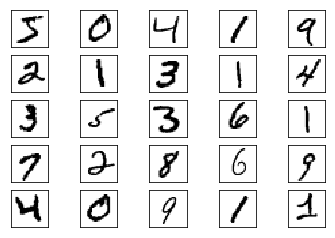

In [40]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train.reshape(X_train.shape[0], 28, 28)[i], interpolation='nearest', cmap='gray_r')


In [22]:
# We will use the Adam optimizer
def get_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

In [24]:
def get_generator(optimizer):
    generator = Sequential()
    generator.add(Dense(256, input_dim=random_dim, init = 'uniform'))
    generator.add(LeakyReLU(alpha=0.2))

    generator.add(Dense(512))
    generator.add(LeakyReLU(alpha=0.2))

    generator.add(Dense(1024))
    generator.add(LeakyReLU(alpha=0.2))

    generator.add(Dense(784, activation='tanh'))
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return generator


In [26]:
def get_discriminator(optimizer):
    discriminator = Sequential()
    discriminator.add(Dense(1024, input_dim=784, init = 'uniform'))
    discriminator.add(LeakyReLU(alpha=0.3))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(alpha=0.3))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(alpha=0.3))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator

In [27]:
def get_gan_network(discriminator, random_dim, generator, optimizer):
    
    # We initially set trainable to False since we only want to train either the
    # generator or discriminator at a time
    discriminator.trainable = False
    
    # gan input (noise) will be 100-dimensional vectors
    gan_input = Input(shape=(random_dim,))
    
    # the output of the generator (an image)
    x = generator(gan_input)
    
    # get the output of the discriminator (probability if the image is real or not)
    gan_output = discriminator(x)
    
    gan = Model(input=gan_input, output=gan_output) # inputs and outputs under keras version 2.2.2
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return gan

###  A function which will save your generated images every 20 epochs

In [51]:
# Create a wall of generated MNIST images
def plot_generated_images(epoch, generator, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, random_dim])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image_epoch_%d.png' % epoch)

### Training the GAN

--------------- Epoch 1 ---------------
Cost of D after epoch 1: 0.469813
Cost of G after epoch 1: 1.341511
--------------- Epoch 2 ---------------
Cost of D after epoch 2: 0.420051
Cost of G after epoch 2: 1.799440
--------------- Epoch 3 ---------------
Cost of D after epoch 3: 0.423781
Cost of G after epoch 3: 2.793639
--------------- Epoch 4 ---------------
Cost of D after epoch 4: 0.458507
Cost of G after epoch 4: 1.715481
--------------- Epoch 5 ---------------
Cost of D after epoch 5: 0.440169
Cost of G after epoch 5: 1.527018
--------------- Epoch 6 ---------------
Cost of D after epoch 6: 0.476364
Cost of G after epoch 6: 1.761829
--------------- Epoch 7 ---------------
Cost of D after epoch 7: 0.523748
Cost of G after epoch 7: 1.734371
--------------- Epoch 8 ---------------
Cost of D after epoch 8: 0.510779
Cost of G after epoch 8: 1.837348
--------------- Epoch 9 ---------------
Cost of D after epoch 9: 0.510891
Cost of G after epoch 9: 1.370344
--------------- Epoch 10 ---

--------------- Epoch 75 ---------------
Cost of D after epoch 75: 0.677026
Cost of G after epoch 75: 0.896710
--------------- Epoch 76 ---------------
Cost of D after epoch 76: 0.663638
Cost of G after epoch 76: 0.907716
--------------- Epoch 77 ---------------
Cost of D after epoch 77: 0.699524
Cost of G after epoch 77: 0.898458
--------------- Epoch 78 ---------------
Cost of D after epoch 78: 0.692902
Cost of G after epoch 78: 0.868908
--------------- Epoch 79 ---------------
Cost of D after epoch 79: 0.691382
Cost of G after epoch 79: 0.873150
--------------- Epoch 80 ---------------
Cost of D after epoch 80: 0.656971
Cost of G after epoch 80: 0.869483
--------------- Epoch 81 ---------------
Cost of D after epoch 81: 0.684788
Cost of G after epoch 81: 0.954173
--------------- Epoch 82 ---------------
Cost of D after epoch 82: 0.683492
Cost of G after epoch 82: 0.917872
--------------- Epoch 83 ---------------
Cost of D after epoch 83: 0.658555
Cost of G after epoch 83: 0.933455
-

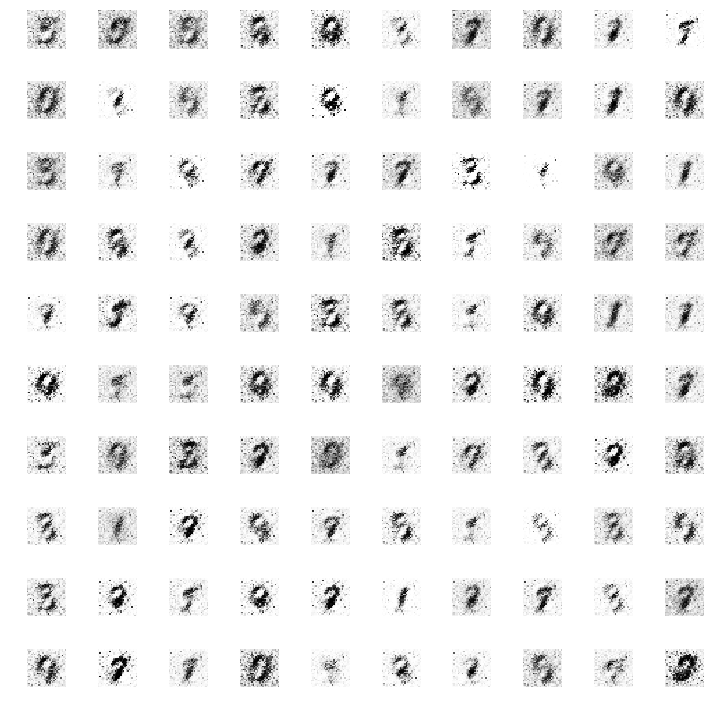

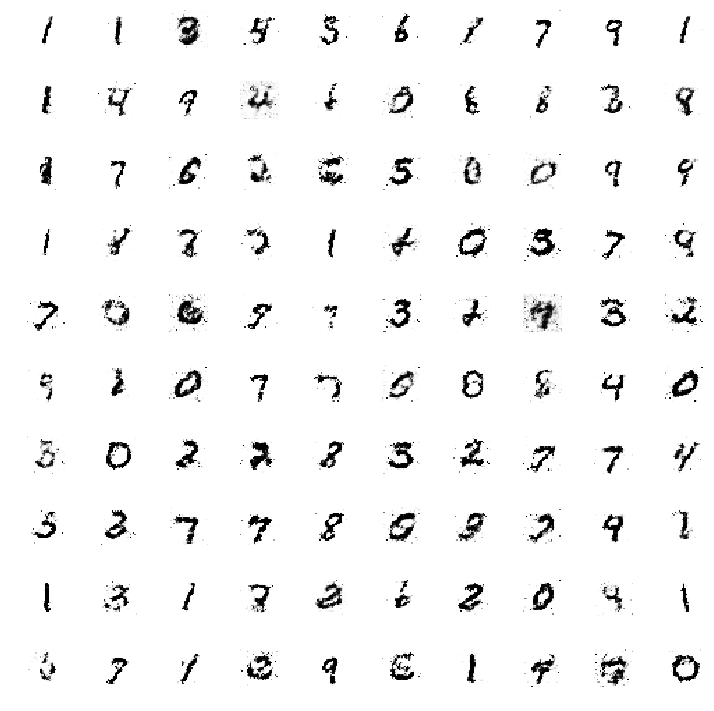

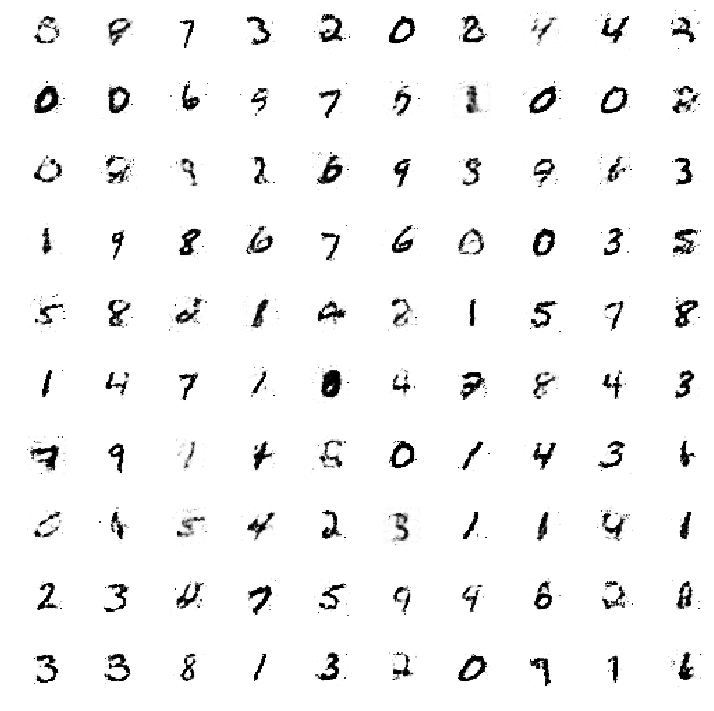

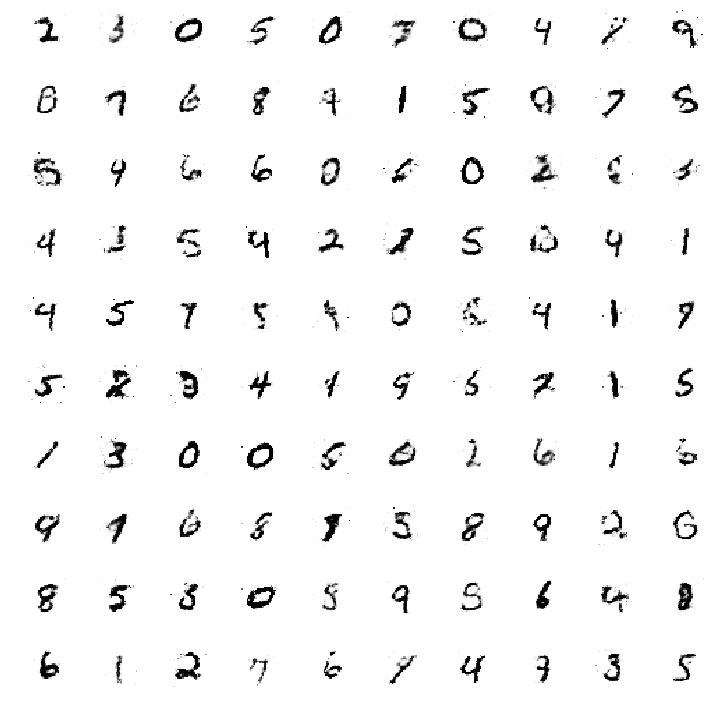

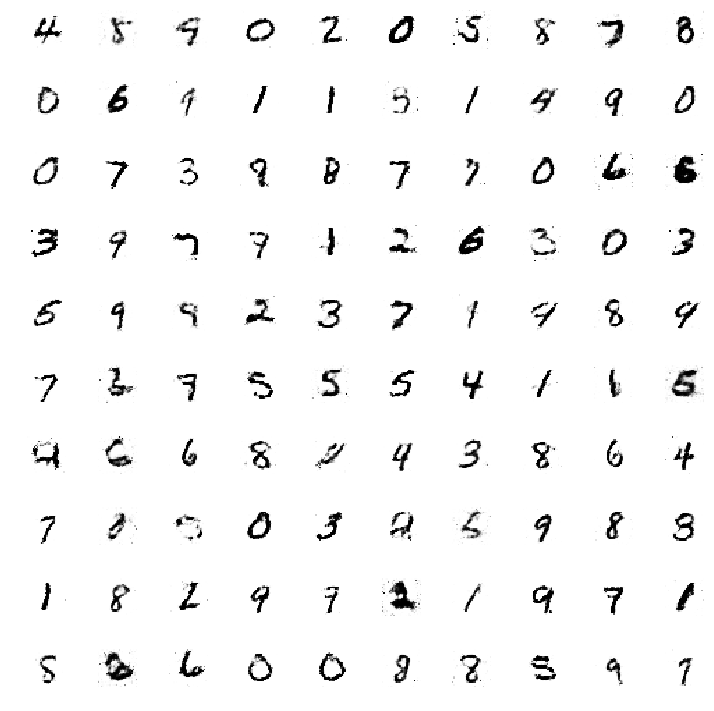

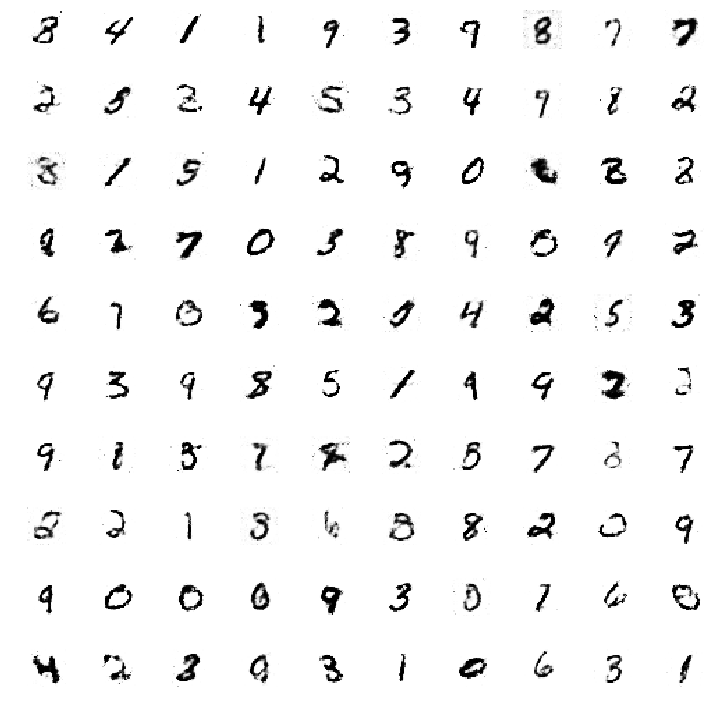

In [55]:
def train(X_train, y_train, x_test, y_test, epochs=100, minibatch_size=128, random_dim = 100):

# Build our GAN network
    adam = get_optimizer()
    G = get_generator(adam)
    D = get_discriminator(adam)
    gan = get_gan_network(D, random_dim, G, adam)

    for e in range(1, epochs+1):
        print('-'*15, 'Epoch %d' % e, '-'*15)
        
        # Defines a cost related to an epoch
        epoch_cost = 0.                       
        
        
        # get number of minibatch based on size of data
        num_minibatches = int(X_train.shape[0] / minibatch_size) # number of minibatches of size minibatch_size in the train set
        
        # Randomize data point
        X_train, y_train = shuffle(X_train, y_train)
        
        
        # Split the training data into batches of size 128
        for i in range(0, X_train.shape[0], minibatch_size):
            #print(i)
            
            # Get pair of (X, y) of the current minibatch
            X_train_mini = X_train[i:i + minibatch_size]
            y_train_mini = y_train[i:i + minibatch_size]
                
                
            ##### Train discriminator #####
            # Get a set of legit images from MNIST data
            legit_images = X_train_mini[np.random.randint(0, X_train_mini.shape[0], size=int(minibatch_size/2))]

            # Get a set of fake images generated from noise
            noise = np.random.normal(0, 1, size=[int(minibatch_size/2), random_dim]) # random_dim = 100 here
            syntetic_images = G.predict(noise)
    
    
            # create 1 dataset with both legit (1) and generated (0) images
            x_combined_batch = np.concatenate((legit_images, syntetic_images))
            y_combined_batch = np.concatenate((np.ones((int(minibatch_size/2), 1)), np.zeros((int(minibatch_size/2), 1))))
            y_combined_batch[:int(minibatch_size/2)] = 0.9 # only for real images

            # Train discriminator
            D.trainable = True
            d_loss = D.train_on_batch(x_combined_batch, y_combined_batch)
            
            
            ###### Train generator #####
            noise = np.random.normal(0, 1, size=[minibatch_size, random_dim])
            y_gen = np.ones(minibatch_size)
            D.trainable = False
            g_loss = gan.train_on_batch(noise, y_gen)

            
        print ("Cost of D after epoch %i: %f" % (e, d_loss))
        print ("Cost of G after epoch %i: %f" % (e, g_loss))
            
               
            
        if e == 1 or e % 20 == 0:
            
            
            """# PLOT examples of 5 first synthetic images created by G
            for i in range(5):
                plt.subplot(5,5,i+1)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                plt.imshow(syntetic_images.reshape(int(minibatch_size/2), 28, 28)[i], interpolation='nearest', cmap='gray_r')
            plt.show()"""
            
            plot_generated_images(e, G)
            
    # Save models in case (creates a HDF5 file 'model.h5')    
    G.save('Generator.h5') 
    D.save('Discriminator.h5')

            
            
            
if __name__ == '__main__':
    train(X_train, y_train, X_test, y_test, epochs = 100, minibatch_size=128, random_dim = 100) # random_dim = The dimension of our random noise vector.
    
    